----
## Method 1: Windspeed rose chart

In [1]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

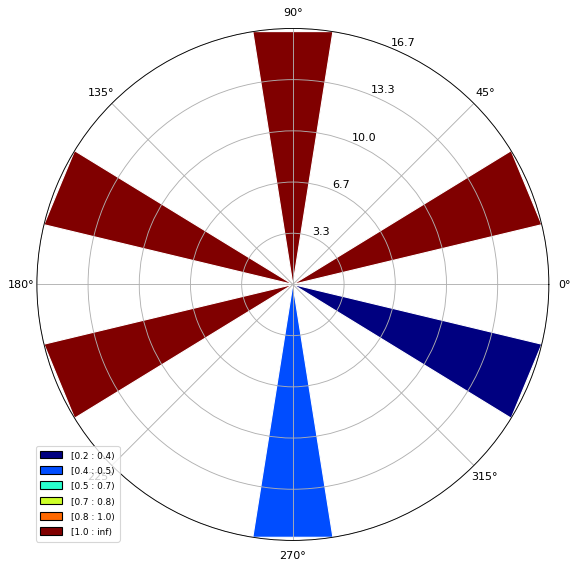

In [2]:
# Create wind speed and direction variables

ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

ws = [1,0.2,0.5,1,1,1]
wd = [60,120,180,240,300,360]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws,normed=True, opening=0.8, edgecolor='white', bins = 6)
ax.set_legend()

----
## Method 2: Interactive Nightingale Chart

In [2]:
import numpy as np
import pandas as pd
from pyecharts.charts import Pie
from pyecharts import options as opts

In [3]:
c = ["Exams","Processing Information", "Notes", "Memory", "Time Management", "Wellbeing", "Mindset"]

d = [43,56,64,98,12,72]

# create the color_series for the rosechart
color_series = ['#802200','#B33000','#FF4500','#FAA327','#9ECB3C',
 '#6DBC49']

rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
# set the color
rosechart.set_colors(color_series)
# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='Nightingale Rose Chart',subtitle="Student Score"),
                     #legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())

# set the series options
# rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,formatter="{b}:{c}%", font_style="italic",font_weight="bold", font_family="Century"),)
rosechart.render_notebook()

----
# Method 3 - MatPlotLib

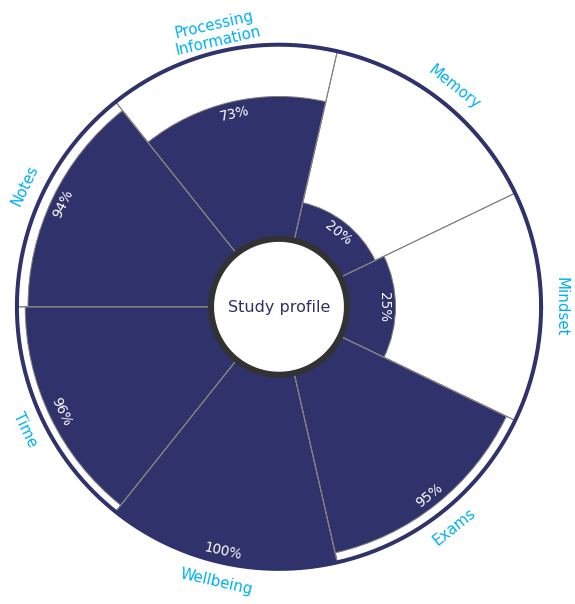

In [52]:
# Big thank you to Stefan Hrouda-Rasmussen for a demonstration of this kind of code at
# https://cookieblues.medium.com/how-to-make-a-nightingale-rose-diagram-only-using-matplotlib-c581441e8cc4
import numpy as np
import matplotlib.pyplot as plt

CENTER_WRITING_COL = "#2F326B"
PERCENTAGE_COL = "white"
METRIC_COL = "#00B0F0"
INNER_BORDER_COL = "#323232"
DARK_BLUE = "#2F326B"
GREY = "#808080"

n_points = 7
inner_radius = 0.35

# White background / Blue outer ring
background = [1] * n_points

# Results
results = np.array(old_pc)

# Going from [Mindset, Memory, Processing, Notes, Time, Wellbeing, Exams]
# to [Processing, Notes,Memory, Time, Mindset, Wellbeing, Exams]
new_order = [2,3,1,4,0,5,6]
results = [results[i] for i in new_order]

# Now need to 'spin the wheel' to match original format
# new_order = [4,0,5,6,2,3,1]
# results = [results[i] for i in new_order]

x_max = 2*np.pi
x_coords = np.linspace(0, x_max, n_points, endpoint=False)
width = x_max / n_points

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot Background
ax.bar(
    x_coords,
    background,
    width=width,
    bottom=inner_radius,
    color="white",
    edgecolor="white",
    linewidth=3
)
# Plot Results
ax.bar(
    x_coords,
    results,
    width=width,
    bottom=inner_radius,
    color="#2F326B",
    edgecolor="#808080",
    linewidth=1
)

# Plot grey lines
ax.bar(
    x_coords,
    background,
    width=width,
    bottom=inner_radius,
    fill = False,
    edgecolor="#808080",
    linewidth=1
)

# Plot outer ring
n_border_points = 1000
border_points = np.linspace(0, x_max, n_border_points, endpoint=False)
ax.plot(border_points, [1 + inner_radius] * n_border_points, c = "#2F326B", linewidth = 4)

# Plot Inner ring
ax.plot(border_points, [inner_radius] * n_border_points, c = INNER_BORDER_COL, linewidth = 6)


# Add Percentages
OFFSET = -0.06 # Offset from top of bar
for i in range(n_points):
    ax.text(x=x_coords[i], y=results[i] + inner_radius + OFFSET, s=f"{round(100*results[i])}%",c = "white",
                fontsize = 13.5, # Font size
                 ha = "center", va = "center", # Center justified rotation
                 # Rotation changes over all values
                 rotation = 270 + (i * 360/n_points) if i in [0,1,2,3] else 90 + (i * 360/n_points))

# Add Titles
OFFSET = 0.1
# Metrics
METRICS = ["Mindset","Memory","Processing\nInformation", "Notes", "Time", "Wellbeing", "Exams"]
for i in range(n_points):
    ax.text(x=x_coords[i], y= 1 + inner_radius + OFFSET, s=METRICS[i],c = "#00B0F0",
                 fontsize = 15, # Font size
                 ha = "center", va = "center", # Center justified rotation
                 # Rotation changes over all values
                 rotation = 270 + (i * 360/n_points) if i in [0,1,2,3] else 90 + (i * 360/n_points))

# Center
ax.text(x=0,y=0, s="Study profile", c = CENTER_WRITING_COL,
        fontsize = 16,
        ha = "center", va = "center")

plt.axis("off")
fig.savefig("test_chart.png")
plt.show()

----
# On the issue of grad pack statistics
We will try to use matplotlib's image functionality to automate calculations of percentage change for a student

In [1]:
# import matplotlib.image
import matplotlib.image as mpimg

In [2]:
# Input raw values

# Total available marks for [Mindset,Memory,Processing Info, Notes, Time, Wellbeing, Exams]
N_SCORES = 7
TOTAL_AVAILABLE = [70,30,40,50,140,50,80]

# Old scores
old_scores = [67,22,10,10,132,50,76]

# New scores
new_scores = [67,25,38,10,132,50,76]

In [3]:
# Generate percentages by dividing through by total available points for each section
old_pc = [old_scores[i]/TOTAL_AVAILABLE[i] for i in range(N_SCORES)]
new_pc = [new_scores[i]/TOTAL_AVAILABLE[i] for i in range(N_SCORES)]

# Calculate changes
changes= [round(100*(new_pc[i]- old_pc[i])/old_pc[i]) for i in range(N_SCORES)]

# And overall average change
avg_change = round(sum(changes)/N_SCORES)

changes

[0, 14, 280, 0, 0, 0, 0]

In [70]:
# Now that changes have been recorded, a little switcheroo must occur because the order of diagnostic questions is not
# the same as the order on the grad pack.

# Going from [Mindset, Memory, Processing, Notes, Time, Wellbeing, Exams]
# to [Processing, Notes,Memory, Time, Mindset, Wellbeing, Exams]
new_order = [2,3,1,4,0,5,6]
changes = [changes[i] for i in new_order]
changes

[280, 0, 14, 0, 0, 0, 0]

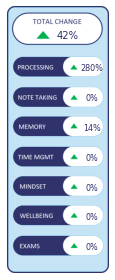

In [71]:
img = mpimg.imread('column_template.png')
fig, ax = plt.subplots()#dpi=500)
ax.axis('off')
# Add the figure
ax.imshow(img)

# Add each of the % changes
startx = 560
starty = 410
for i in range(N_SCORES):
    ax.text(startx,starty + 198*i, s= f"{changes[i]}%", c = "#2F326B", ha = 'center', va = 'center', size = 8)

# Add the avg change
ax.text(400,190,s= f"{avg_change}%", c="#2F326B", ha = 'center', va = 'center')
# Adjust figure properties then save
fig.tight_layout()
plt.savefig("coltest1.png")